In [1]:
import os, sys
import inspect
from IPython.display import Markdown, display
from pathlib import Path
import model
repo_path = os.path.abspath('')
#display(repo_path)
repo_path = os.path.dirname(os.path.abspath(os.path.join(repo_path)))
#display(os.getcwd())
if os.getcwd() != str(Path(repo_path).parent):
    os.chdir(os.path.join(str(Path(repo_path).parent)))
    #print(sys.path)
#display(os.getcwd())
sys.path.append(repo_path)
sys.path.append(os.path.join(repo_path, 'model/code'))
#display(os.getcwd())

# Table of contents

1. [Background](#background)
2. [Installing the module](#installation)
3. [Model structure](#s_structure)
    1. [code](#code)
    2. [data](#data)
    3. [configs](#configs)
    4. [code_guide](#code_guide)
4. [Run an example simulation](#run_simulation)



# 1. Background  <a name="background"></a>


The model inputs are: 
- HH size distribution in the data folder which is only used when hh_size_distribution is set as "distribution". If "hh_size_distribution" is set as "constant", then all households are created with a size of "hh_size" parameter.

- Params dataclass from the configs folder:
    {
    "no_runs": 20,
    "hh_size": 5, #not used if hh_size_distribution is set as "distribution"
    "hh_size_distribution": "distribution", #or "constant"
    "inf_duration_gamma_mean": 7.68, #days
    "inf_duration_gamma_shape": 3, #days
    "exposed_duration": 5.2, #days
    "random_seed": 10, #seed used for the batch run
    "transmission_rate": 0.0165, # defined below
    "time_horizon": 80, #days
    "time_step": 0.01, #days #the transmission_rate parameter is adjusted in the model accordingly
    "record_transmission": true,
    "record_all_new_cases": true
    }


"transmission_rate" is the probability of transmission per day per number of infected household members for a susceptible household member. For instance, assume that "transmission_rat"e is 0.1 per day, "time_step" is 1 (day), and there are two infected and three susceptible individuals in a household with size 5 at a given day. For each susceptible household member, the probability of getting infected for that day is 0.1 * 2 = 0.2. 


The model outputs are:
- all_exposed_cases.csv: records details of all exposed individuals. It includes following columns:

    
    |id	|state	| s_time_exposed	| s_time_infectious	| s_time_recovery	| exposed_from	| hh_size | 	hh_id	| run_no |
    | --- | --- | --- | --- | --- | --- | --- | --- | --- |

    

- exposed_by_seed.csv: records details of individuals exposed by the seed infected individual as well as the details of the seed individual. It includes following columns:

    
    |id	|state	| s_time_exposed	| s_time_infectious	| s_time_recovery	| exposed_from	| hh_size | 	hh_id	| run_no |
    | --- | --- | --- | --- | --- | --- | --- | --- | --- |

- transmission.csv: At any given time it records number of individuals in the states of Susceptible, Exposed, Infected, Recovered. It includes following columns:
    
     | state	| count	| t	| run_no |
    | --- | --- | --- | --- | 

- sar.csv: It records secondary attack rate (SAR) per simulation. It includes the following columns:

    | run_no | hh_id	| hh_size	| secondary_cases	| SAR |
    | --- | --- | --- | --- | --- | 

- sar.summary.csv: It records summary of the SAR records from the sar.csv file. It includes the following columns:

    | mean_SAR	| median_SAR	| quantile_0.025_SAR	| quantile_0.1_SAR	| quantile_0.25_SAR	| quantile_0.75_SAR |	quantile_0.9_SAR |	quantile_0.975_SAR |
    | --- | --- | --- | --- | --- | --- | --- | --- | 



# 2. Installing the module <a name="installation"></a>
The module installation is described in [README.md](../../../README.md) file. The module must be install through terminal:
```shell
python3 -m venv venv
source venv/bin/activate
# set working directory as code repository then
pip install -e .
```

# 3. Repo structure <a name="s_structure"></a> 

The repository that simulates pneumococcal transmission in an aged-structured population is structured as the following: 

1. [code](#code): stores scripts to run and analyse scabies transmission simulations
2. [data](#data): stores hh size distributions
3. [configs](#configs): base parameter configurations
4. [code_guide](#code_guide): stores code guidelines

### 3.1. Code <a name="code"></a>

### 3.2. Data <a name="data"></a>

### 3.3. Configs <a name="configs"></a>

Configs folder include ...param.txt files.

### 3.4. Code guide <a name="code_guide"></a>

code_guide folder includes this documentation of the repository.



# 4. Run an example simulation <a name="run_simulation"></a>



The examplar scenario below runs transmission of serotypes between 2002-2004 and plots prevalence of individual serotypes based on their vaccine groupings.

['/Users/tellioglun/Documents/hh_transmission/src/model/code', '/Users/tellioglun/miniconda3/lib/python312.zip', '/Users/tellioglun/miniconda3/lib/python3.12', '/Users/tellioglun/miniconda3/lib/python3.12/lib-dynload', '', '/Users/tellioglun/python_envs/hh_model/lib/python3.12/site-packages', '/Users/tellioglun/Documents/hh_transmission/src', '/Users/tellioglun/Documents/hh_transmission/src/model', '/Users/tellioglun/Documents/hh_transmission/src/model/model/code']
['/Users/tellioglun/Documents/hh_transmission/src/model/code', '/Users/tellioglun/miniconda3/lib/python312.zip', '/Users/tellioglun/miniconda3/lib/python3.12', '/Users/tellioglun/miniconda3/lib/python3.12/lib-dynload', '', '/Users/tellioglun/python_envs/hh_model/lib/python3.12/site-packages', '/Users/tellioglun/Documents/hh_transmission/src', '/Users/tellioglun/Documents/hh_transmission/src/model', '/Users/tellioglun/Documents/hh_transmission/src/model/model/code']
Execution time: 36.67477893829346 seconds
shape: (1, 8)
┌───

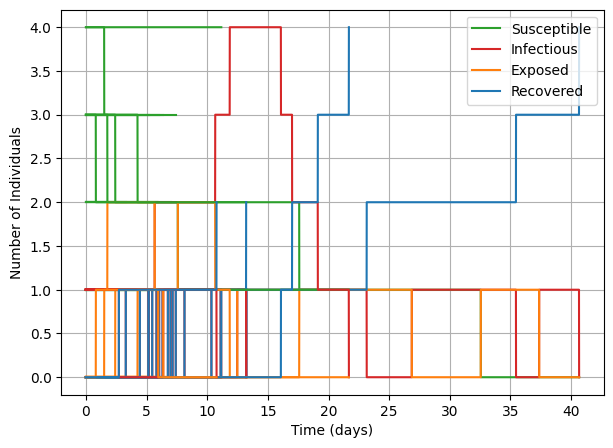

In [2]:
#model_dir = Path(model.__file__).resolve().parent
#print("model package dir:", model_dir)#target = model_dir / "code" / "run_exemplar_scenario.py"
#import runpy
#runpy.run_path(str(target), run_name="__main__")
%run model/code/run_exemplar_scenario.py